# DSA Assignment 6 


💡 **Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]


In [1]:
class Solution():
    def permutuations(self,s):
        nums=list(range(len(s)+1))
        result=[]
        for i in s:
            if i=='I':
                result.append(min(nums))
                nums.remove(min(nums))
            elif i=='D':
                result.append(max(nums))
                nums.remove(max(nums))
        result.append(min(nums))
        return result
            

In [2]:
s = "IDID"
Solution().permutuations(s)

[0, 4, 1, 3, 2]

In [3]:
s = "III"
Solution().permutuations(s)

[0, 1, 2, 3]

In [4]:
s = "DD"
Solution().permutuations(s)

[2, 1, 0]


💡 **Question 2**

You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity

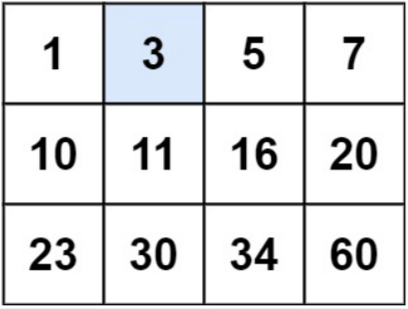

**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true


In [5]:
class Solution:
    def searchElement(self, array, target):
        m, n = len(array), len(array[0])
        i, j = 0, m * n - 1
        
        while i <= j:
            mid = (i + j) // 2
            row = mid // n
            col = mid % n
            if array[row][col] == target:
                return True
            elif array[row][col] < target:
                i = mid + 1
            else:
                j = mid - 1
        
        return False

In [6]:
array = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
target=3
Solution().searchElement(array,target)

True

In [7]:
array = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
target=21
Solution().searchElement(array,target)

False


💡 **Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]
    
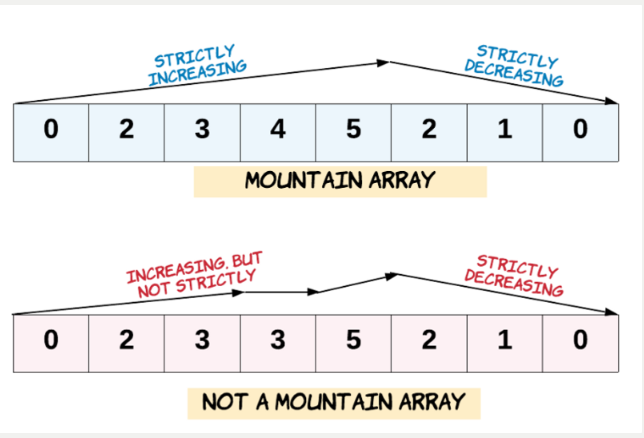

**Example 1:**

**Input:** arr = [2,1]

**Output:**

false


In [8]:
class Solution:
    def mountain(self, arr):
        if len(arr) < 3:
            return False
        
        peak_index = arr.index(max(arr))
        
        if peak_index == 0 or peak_index == len(arr) - 1:
            return False
        
        for i in range(peak_index):
            if arr[i] >= arr[i + 1]:
                return False
        
        for i in range(peak_index, len(arr) - 1):
            if arr[i] <= arr[i + 1]:
                return False
        
        return True


In [9]:
arr=[3,2,1]
Solution().mountain(arr)

False

In [10]:
arr=[1,2,3,4,3,2,1]
Solution().mountain(arr)

True


💡 **Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.



In [11]:
class Solution:
    def findMaxLength(self, nums):
        max_length = 0
        count = 0
        count_map = {0: -1}
        
        for i in range(len(nums)):
            if nums[i] == 0:
                count -= 1
            else:
                count += 1
            
            if count in count_map:
                length = i - count_map[count]
                max_length = max(max_length, length)
            else:
                count_map[count] = i
        
        return max_length


In [12]:
nums=[0,1,1,0,1,1,0,1,0,1]
Solution().findMaxLength(nums)

6


💡 **Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.


In [13]:
def minProductSum(nums1, nums2):
    # Sort nums1 in ascending order
    nums1.sort()
    
    # Sort nums2 in descending order
    nums2.sort(reverse=True)
    
    # Calculate the product sum
    product_sum = sum(nums1[i] * nums2[i] for i in range(len(nums1)))
    
    return product_sum

In [14]:
nums1 = [5,3,4,2]
nums2 = [4,2,2,5]
minProductSum(nums1,nums2)

40


💡 **Question 6**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].


In [15]:
class Solution():
    def doubled(self, changed):
        original = []
        seen = set()

        for num in changed:
            if num / 2 in seen:
                original.append(num // 2)
                seen.remove(num / 2)
            else:
                seen.add(num)

        return original if len(original) == len(changed) / 2 else []


In [16]:
nums = [1,3,4,2,6,8]
Solution().doubled(nums)

[1, 3, 4]


💡 **Question 7**

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.
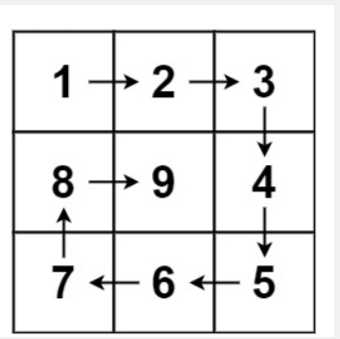

**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]

In [17]:
class Solution:
    def spiral(self, n):
        arr = [[0] * n for _ in range(n)]
        num = 1
        top, bottom, left, right = 0, n - 1, 0, n - 1

        while num <= n * n:
            # Fill top row
            for i in range(left, right + 1):
                arr[top][i] = num
                num += 1
            top += 1

            # Fill right column
            for i in range(top, bottom + 1):
                arr[i][right] = num
                num += 1
            right -= 1

            # Fill bottom row
            for i in range(right, left - 1, -1):
                arr[bottom][i] = num
                num += 1
            bottom -= 1

            # Fill left column
            for i in range(bottom, top - 1, -1):
                arr[i][left] = num
                num += 1
            left += 1

        return arr


In [18]:
n=3
Solution().spiral(n)

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]


💡 **Question 8**

Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**

**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]


In [19]:
class Solution():
    def multiply(self, mat1, mat2):
        m = len(mat1)
        k = len(mat1[0])
        n = len(mat2[0])

        result = [[0] * n for _ in range(m)]

        for i in range(m):
            for j in range(n):
                for p in range(k):
                    result[i][j] += mat1[i][p] * mat2[p][j]

        return result


In [20]:
mat1 = [[1,0,0],[-1,0,3]]
mat2 = [[7,0,0],[0,0,0],[0,0,1]]
solution = Solution()
result = solution.multiply(mat1, mat2)
print(result)


[[7, 0, 0], [-7, 0, 3]]


## The End